## DSN AI Bootcamp Qualification Hackathon By Data Science Nigeria

### To predict customers who will default on a loan

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
from sklearn.preprocessing import Normalizer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (20, 3)
pd.options.display.float_format = '{:20,.4f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(context="paper", font="monospace")

In [2]:
def quality_report(df):
    #define quality of data in terms of missing values..
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis = 1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df = pd.concat([total, percent, nuniq, dtypes], axis = 1, keys=['Total','Percent','Nunique','Dtype'])
    display(quality_df)
    
def object_count_plot(df):
    #plot countplot for all categorical features present in the df passed
    for var in df.columns:
        if df[var].dtype == 'object':
            print(df[var].value_counts())
            plt.figure(figsize=(12, 5))
            g = sns.countplot(x=var, data=df)
            g.set_xticklabels(g.get_xticklabels(), rotation = 90, ha = "right")
            plt.tight_layout()
            plt.show()

def numeric_distribution_plot(df):
    #give distribution plot for all the numeric features in the dataframe
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(12, 5))
            plt.title("Distribution of " + col)
            ax = sns.distplot(df[col].dropna())
            plt.tight_layout()
            plt.show()

In [3]:
train = pd.read_csv('Train_data.csv')
test = pd.read_csv('Test_data.csv')
train.set_index('Applicant_ID', inplace = True)
test.set_index('Applicant_ID', inplace = True)
train.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
Applicant_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Apcnt_1000000,"3,436.0000",0.2851,1.6560,0.0000,0.0000,0.0000,"10,689,720.0000","252,072.0000","4,272,776.0000","11,333,126.0000","4,397,256.0000","2,301,324.0000","7,875,694.0000",96375139,"112,181,765.0000",1.0000,1.0000,1.0000,3.0000,3.0000,134.6550,nan,nan,134.6550,"4,000.5000","17,064.0000","11,376.0000",60.0000,"17,064.0000","5,962.0000",nan,"1,052.0000",8.0000,2.0000,nan,12.0000,12.0000,4.0000,0.0000,nan,nan,0.3929,2.0200,0.7116,0.0000,0.0000,charge,nan,1.1295,0.0443,no
Apcnt_1000004,"3,456.0000",0.6740,0.2342,0.0000,0.0000,0.0000,"898,979.0000","497,531.0000","9,073,814.0000","2,533,168.0000","244,292.0000","3,982,971.0000","2,141,445.0000",28141427,"45,169,902.0000",1.0000,1.0000,1.0000,2.0000,2.0000,109.2300,"11,385.2400","14,584.2900",86.6850,"4,161.0000","13,413.0000","8,942.0000",304.0000,"13,413.0000","5,780.0000",nan,"2,554.0000",17.5000,0.0000,0.0000,16.0000,24.0000,8.0000,0.0000,nan,nan,0.3143,8.0800,0.1836,nan,0.0000,charge,349.8057,1.6205,0.3224,no
Apcnt_1000008,"3,276.0000",0.5384,3.1510,0.0000,6.2820,nan,"956,940.0000",nan,"192,944.0000","1,079,864.0000",nan,nan,0.0000,16576457,"22,452,691.0000",nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,"1,597.5000","4,746.0000","3,164.0000",60.0000,"15,696.0000",nan,"14,508.0000",70.0000,0.6666,0.0000,nan,12.0000,0.0000,6.0000,0.0000,149.6805,nan,0.1630,18.1800,0.7911,0.0000,0.0000,charge,nan,1.5134,0.0116,yes
Apcnt_1000012,"3,372.0000",0.1701,0.5050,0.0000,0.0000,"192,166.0000","3,044,703.0000","385,499.0000","3,986,472.0000","3,621,979.0000",nan,"771,776.0000","1,186,839.0000",48187375,"136,297,820.0000",0.0000,0.0000,0.0000,1.0000,1.0000,120.1200,"8,580.0000",0.0000,85.8000,"1,701.0000","4,014.0000","2,676.0000",60.0000,"11,679.0000",nan,nan,522.0000,7.8334,1.0000,1.0000,4.0000,8.0000,4.0000,1.0000,nan,nan,0.4889,2.0200,0.6852,nan,0.0000,charge,89.9401,0.6645,0.0827,no
Apcnt_1000016,"3,370.0000",0.7727,1.1010,0.0000,0.0000,"1,556.0000","214,728.0000","214,728.0000","1,284,089.0000","361,770.0000","396,391.0000","818,456.0000","511,535.0000",28141427,"15,292,757.0000",0.0000,0.0000,0.0000,3.0000,3.0000,104.5350,"8,360.1900","10,326.4500",115.3350,"1,551.0000","3,285.0000","2,190.0000",60.0000,"19,437.0000","12,958.0000","5,202.0000",272.0000,1.0000,0.0000,0.0000,24.0000,2.0000,24.0000,0.0000,150.0135,nan,0.2750,12.1200,0.4382,0.0000,0.0000,charge,97.8875,1.4279,0.0456,no


In [4]:
print('Shape of train set = ', train.shape)
print('Shape of test set = ', test.shape)

Shape of train set =  (56000, 51)
Shape of test set =  (24000, 50)


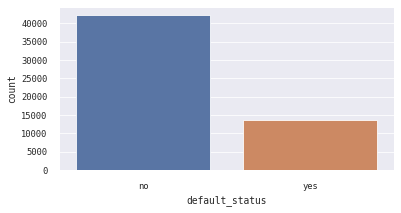

In [5]:
plt.figure(figsize = (6, 3))
sns.countplot(train['default_status'])

In [6]:
train['default_status'].value_counts(normalize = True) * 100

no                 75.5089
yes                24.4911
Name: default_status, dtype: float64

In [7]:
quality_report(train)

,Total,Percent,Nunique,Dtype
form_field40,43729,78.0875,9848,float64
form_field31,39408,70.3714,394,float64
form_field41,38229,68.2661,14375,float64
form_field11,31421,56.1089,9508,float64
form_field45,31317,55.9232,6,float64
form_field23,28123,50.2196,16619,float64
form_field30,25509,45.5518,274,float64
form_field35,23148,41.3357,11,float64
form_field15,22475,40.1339,23783,float64
form_field48,20889,37.3018,32115,float64


In [8]:
train.isna().sum()

form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41      38229
form_field42    

In [9]:
test.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
Applicant_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Apcnt_1000032,"3,236.0000",0.3488,10.2006,0.0000,0.0000,"418,564.0000","418,564.0000","418,564.0000","540,710.0000",0.0000,"1,649,749.0000","5,446.0000",0.0000,48187375,"114,686,147.0000",0.0000,0.0000,0.0000,0.0000,0.0000,nan,nan,nan,nan,"1,086.0000","6,204.0000","2,676.0000",60.0000,"14,691.0000","9,794.0000",nan,238.0000,1.8334,0.0000,nan,22.0000,2.0000,14.0000,0.0000,nan,nan,0.8250,1.0100,0.8000,nan,0.0000,charge,nan,0.0000,0.0112
Apcnt_1000048,"3,284.0000",1.2736,2.9606,9.0198,0.0000,0.0000,"9,858,816.0000","49,014.0000","1,510,098.0000","18,308,285.0000","622,789.0000","1,025,793.0000","1,396,510.0000",34694910,"87,479,487.0000",1.0000,1.0000,1.0000,2.0000,2.0000,142.5600,nan,nan,570.5850,"3,082.5000","10,221.0000","6,814.0000",60.0000,"11,955.0000","3,528.0000",nan,"1,216.0000",19.5000,3.0000,nan,30.0000,18.0000,14.0000,2.0000,nan,18.8415,0.5077,4.0400,0.6232,1.0000,0.0000,lending,nan,0.5050,0.0435
Apcnt_1000052,nan,0.2751,0.0600,0.0000,0.0000,nan,nan,nan,nan,0.0000,"118,256.0000",nan,nan,21973443,nan,nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,nan,nan,nan,852.0000,"4,836.0000",nan,nan,nan,7.8334,0.0000,nan,2.0000,nan,0.0000,nan,nan,nan,nan,0.0000,nan,nan,nan,charge,nan,0.0000,nan
Apcnt_1000076,"3,232.0000",0.2851,2.8032,0.0000,0.0000,0.0000,"473,802.0000","473,802.0000","1,724,437.0000","493,641.0000","1,391,064.0000","1,176,725.0000","1,220,293.0000",16576457,nan,2.0000,2.0000,2.0000,3.0000,3.0000,109.0050,"13,050.0000",nan,109.0050,"1,414.5000","4,197.0000","2,798.0000",60.0000,"14,964.0000",nan,nan,248.0000,9.0000,1.0000,1.0000,36.0000,0.0000,26.0000,0.0000,nan,nan,0.9167,2.0200,0.4642,nan,nan,charge,90.1637,0.7888,0.1040
Apcnt_1000080,"3,466.0000",2.0955,0.8318,2.5182,0.0000,"19,839.0000","1,150,662.0000","1,150,662.0000","7,860,523.0000","5,752,921.0000","271,133.0000","613,064.0000","4,779,643.0000",48187375,"72,049,802.0000",0.0000,0.0000,0.0000,3.0000,3.0000,139.0650,469.2900,469.2900,15.1800,"2,724.0000","9,855.0000","6,570.0000",182.0000,"11,679.0000","5,900.0000",nan,"2,388.0000",16.6666,1.0000,0.0000,24.0000,28.0000,20.0000,0.0000,nan,nan,0.2340,23.2300,0.7267,0.0000,0.0000,lending,"1,303.5871",1.6377,0.1631


In [10]:
test.isna().sum()

form_field1      1110
form_field2      1709
form_field3       146
form_field4       146
form_field5       146
form_field6      5604
form_field7      2231
form_field8      5604
form_field9      3400
form_field10      147
form_field11    13398
form_field12     4183
form_field13     2463
form_field14        0
form_field15     9592
form_field16     5474
form_field17     4695
form_field18     4369
form_field19        0
form_field20      147
form_field21     6707
form_field22     8724
form_field23    12125
form_field24     5605
form_field25     2256
form_field26     3172
form_field27     3910
form_field28      147
form_field29      147
form_field30    10908
form_field31    16810
form_field32     2256
form_field33      495
form_field34      147
form_field35     9866
form_field36      903
form_field37     2256
form_field38      147
form_field39     1829
form_field40    18828
form_field41    16349
form_field42      578
form_field43      250
form_field44     2362
form_field45    13538
form_field

In [11]:
train.dtypes

form_field1       float64
form_field2       float64
form_field3       float64
form_field4       float64
form_field5       float64
form_field6       float64
form_field7       float64
form_field8       float64
form_field9       float64
form_field10      float64
form_field11      float64
form_field12      float64
form_field13      float64
form_field14        int64
form_field15      float64
form_field16      float64
form_field17      float64
form_field18      float64
form_field19      float64
form_field20      float64
form_field21      float64
form_field22      float64
form_field23      float64
form_field24      float64
form_field25      float64
form_field26      float64
form_field27      float64
form_field28      float64
form_field29      float64
form_field30      float64
form_field31      float64
form_field32      float64
form_field33      float64
form_field34      float64
form_field35      float64
form_field36      float64
form_field37      float64
form_field38      float64
form_field39

In [12]:
test.dtypes

form_field1     float64
form_field2     float64
form_field3     float64
form_field4     float64
form_field5     float64
form_field6     float64
form_field7     float64
form_field8     float64
form_field9     float64
form_field10    float64
form_field11    float64
form_field12    float64
form_field13    float64
form_field14      int64
form_field15    float64
form_field16    float64
form_field17    float64
form_field18    float64
form_field19    float64
form_field20    float64
form_field21    float64
form_field22    float64
form_field23    float64
form_field24    float64
form_field25    float64
form_field26    float64
form_field27    float64
form_field28    float64
form_field29    float64
form_field30    float64
form_field31    float64
form_field32    float64
form_field33    float64
form_field34    float64
form_field35    float64
form_field36    float64
form_field37    float64
form_field38    float64
form_field39    float64
form_field40    float64
form_field41    float64
form_field42    

In [13]:
test['default_status'] = 'test'
df = pd.concat([train, test])
df.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
Applicant_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Apcnt_1000000,"3,436.0000",0.2851,1.6560,0.0000,0.0000,0.0000,"10,689,720.0000","252,072.0000","4,272,776.0000","11,333,126.0000","4,397,256.0000","2,301,324.0000","7,875,694.0000",96375139,"112,181,765.0000",1.0000,1.0000,1.0000,3.0000,3.0000,134.6550,nan,nan,134.6550,"4,000.5000","17,064.0000","11,376.0000",60.0000,"17,064.0000","5,962.0000",nan,"1,052.0000",8.0000,2.0000,nan,12.0000,12.0000,4.0000,0.0000,nan,nan,0.3929,2.0200,0.7116,0.0000,0.0000,charge,nan,1.1295,0.0443,no
Apcnt_1000004,"3,456.0000",0.6740,0.2342,0.0000,0.0000,0.0000,"898,979.0000","497,531.0000","9,073,814.0000","2,533,168.0000","244,292.0000","3,982,971.0000","2,141,445.0000",28141427,"45,169,902.0000",1.0000,1.0000,1.0000,2.0000,2.0000,109.2300,"11,385.2400","14,584.2900",86.6850,"4,161.0000","13,413.0000","8,942.0000",304.0000,"13,413.0000","5,780.0000",nan,"2,554.0000",17.5000,0.0000,0.0000,16.0000,24.0000,8.0000,0.0000,nan,nan,0.3143,8.0800,0.1836,nan,0.0000,charge,349.8057,1.6205,0.3224,no
Apcnt_1000008,"3,276.0000",0.5384,3.1510,0.0000,6.2820,nan,"956,940.0000",nan,"192,944.0000","1,079,864.0000",nan,nan,0.0000,16576457,"22,452,691.0000",nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,"1,597.5000","4,746.0000","3,164.0000",60.0000,"15,696.0000",nan,"14,508.0000",70.0000,0.6666,0.0000,nan,12.0000,0.0000,6.0000,0.0000,149.6805,nan,0.1630,18.1800,0.7911,0.0000,0.0000,charge,nan,1.5134,0.0116,yes
Apcnt_1000012,"3,372.0000",0.1701,0.5050,0.0000,0.0000,"192,166.0000","3,044,703.0000","385,499.0000","3,986,472.0000","3,621,979.0000",nan,"771,776.0000","1,186,839.0000",48187375,"136,297,820.0000",0.0000,0.0000,0.0000,1.0000,1.0000,120.1200,"8,580.0000",0.0000,85.8000,"1,701.0000","4,014.0000","2,676.0000",60.0000,"11,679.0000",nan,nan,522.0000,7.8334,1.0000,1.0000,4.0000,8.0000,4.0000,1.0000,nan,nan,0.4889,2.0200,0.6852,nan,0.0000,charge,89.9401,0.6645,0.0827,no
Apcnt_1000016,"3,370.0000",0.7727,1.1010,0.0000,0.0000,"1,556.0000","214,728.0000","214,728.0000","1,284,089.0000","361,770.0000","396,391.0000","818,456.0000","511,535.0000",28141427,"15,292,757.0000",0.0000,0.0000,0.0000,3.0000,3.0000,104.5350,"8,360.1900","10,326.4500",115.3350,"1,551.0000","3,285.0000","2,190.0000",60.0000,"19,437.0000","12,958.0000","5,202.0000",272.0000,1.0000,0.0000,0.0000,24.0000,2.0000,24.0000,0.0000,150.0135,nan,0.2750,12.1200,0.4382,0.0000,0.0000,charge,97.8875,1.4279,0.0456,no


In [14]:
df.shape

(80000, 51)

In [15]:
df.isna().sum()

form_field1        3639
form_field2        5553
form_field3         501
form_field4         501
form_field5         501
form_field6       18964
form_field7        7394
form_field8       18964
form_field9       11408
form_field10        502
form_field11      44819
form_field12      14078
form_field13       8352
form_field14          0
form_field15      32067
form_field16      18510
form_field17      15846
form_field18      14771
form_field19          4
form_field20        502
form_field21      22561
form_field22      29124
form_field23      40248
form_field24      18902
form_field25       7706
form_field26      10610
form_field27      13209
form_field28        502
form_field29        502
form_field30      36417
form_field31      56218
form_field32       7706
form_field33       1751
form_field34        502
form_field35      33014
form_field36       2898
form_field37       7706
form_field38        502
form_field39       6040
form_field40      62557
form_field41      54578
form_field42    

In [16]:
df['form_field47'].value_counts(normalize = True) * 100

charge                 64.8000
lending                35.2000
Name: form_field47, dtype: float64

In [17]:
quality_report(df)

,Total,Percent,Nunique,Dtype
form_field40,62557,78.1963,13623,float64
form_field31,56218,70.2725,412,float64
form_field41,54578,68.2225,19477,float64
form_field45,44855,56.0688,6,float64
form_field11,44819,56.0238,11543,float64
form_field23,40248,50.3100,22454,float64
form_field30,36417,45.5213,279,float64
form_field35,33014,41.2675,11,float64
form_field15,32067,40.0838,33069,float64
form_field48,29811,37.2638,45305,float64


In [18]:
missing_col = df.columns[df.isna().any()]
missing_col

Index(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field11', 'form_field12',
       'form_field13', 'form_field15', 'form_field16', 'form_field17',
       'form_field18', 'form_field19', 'form_field20', 'form_field21',
       'form_field22', 'form_field23', 'form_field24', 'form_field25',
       'form_field26', 'form_field27', 'form_field28', 'form_field29',
       'form_field30', 'form_field31', 'form_field32', 'form_field33',
       'form_field34', 'form_field35', 'form_field36', 'form_field37',
       'form_field38', 'form_field39', 'form_field40', 'form_field41',
       'form_field42', 'form_field43', 'form_field44', 'form_field45',
       'form_field46', 'form_field48', 'form_field49', 'form_field50'],
      dtype='object')

In [19]:
for col in missing_col:
    df[col].fillna(df[col].median(), inplace = True)

In [20]:
#df.isna().sum()

In [21]:
#numeric_distribution_plot(df.drop('default_status', axis = 1))

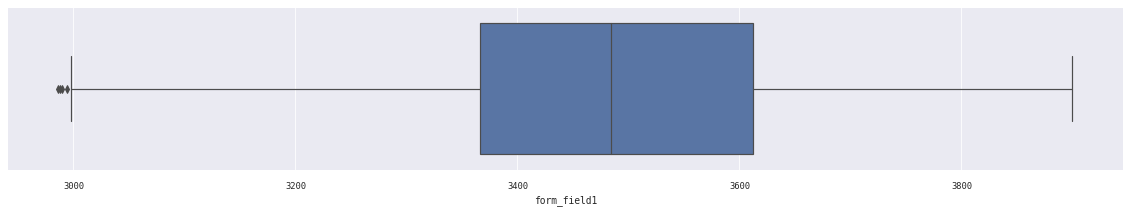

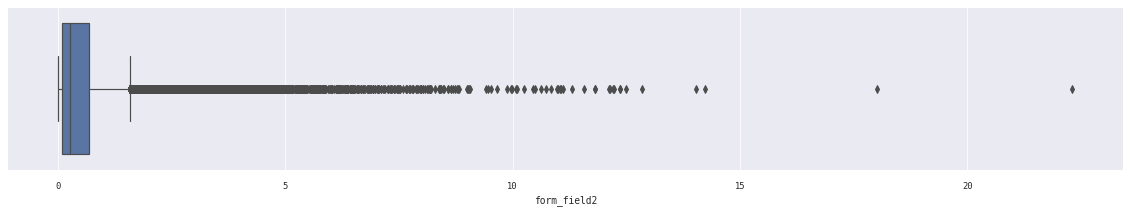

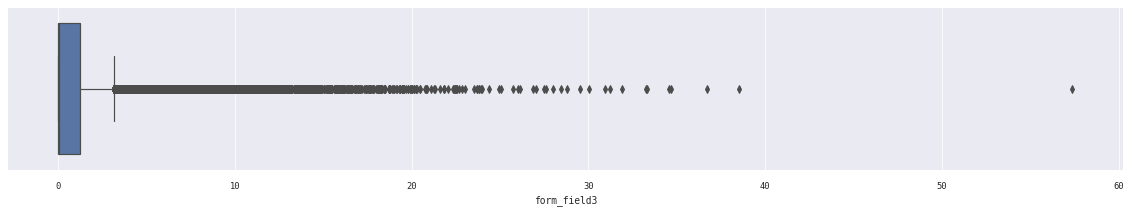

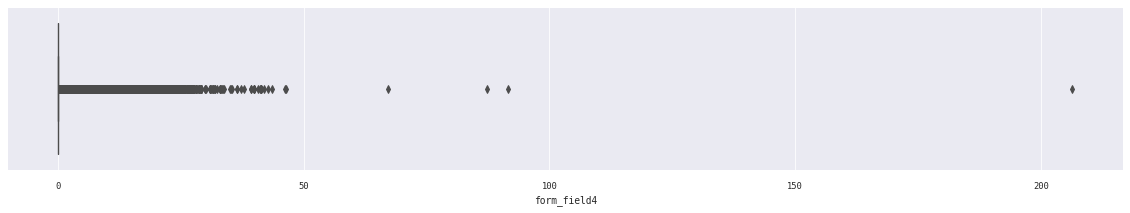

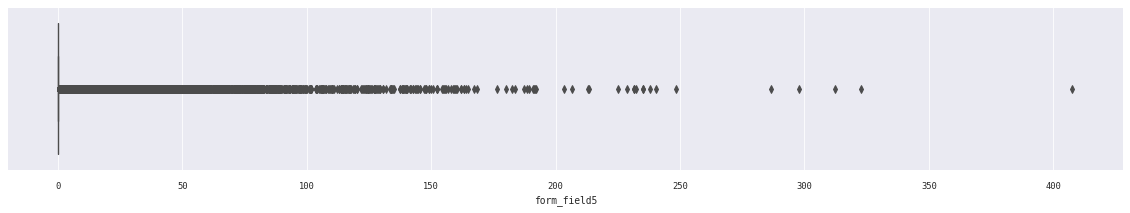

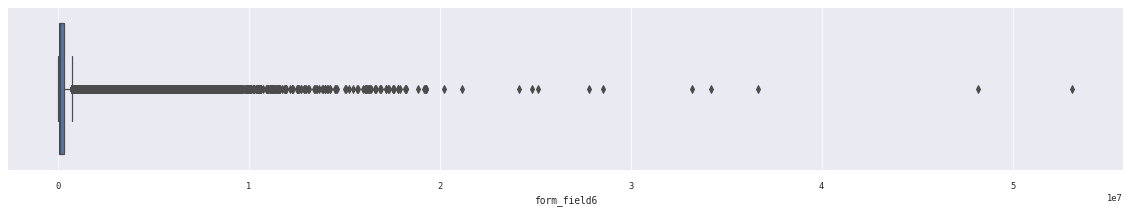

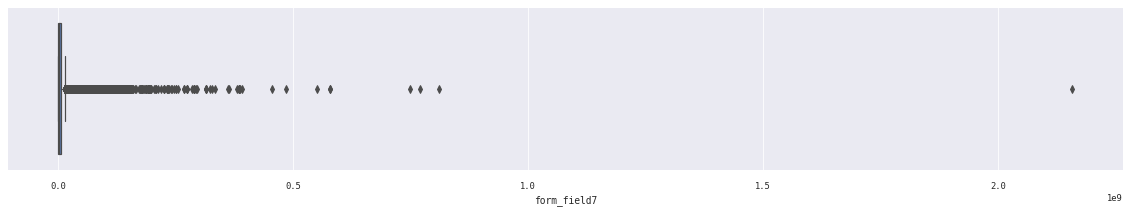

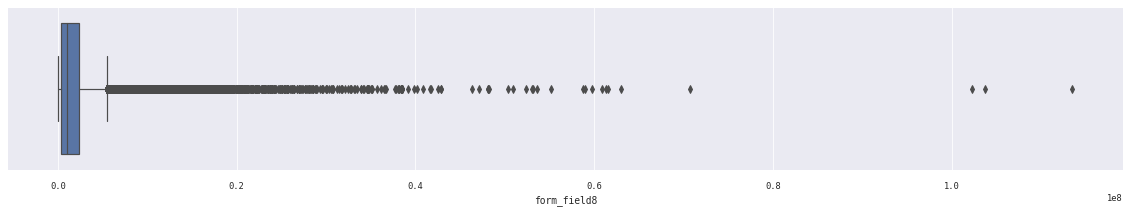

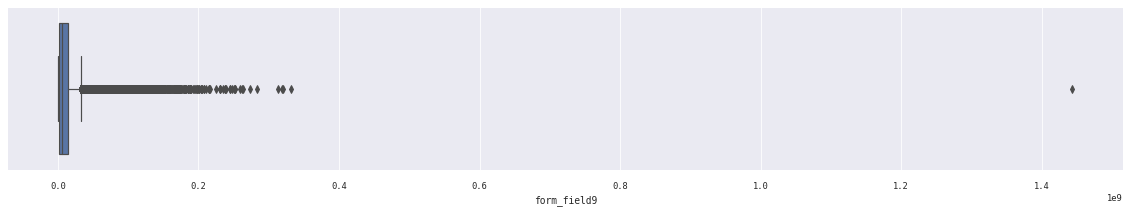

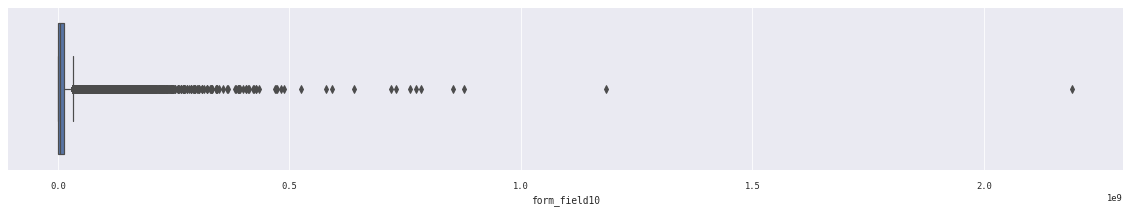

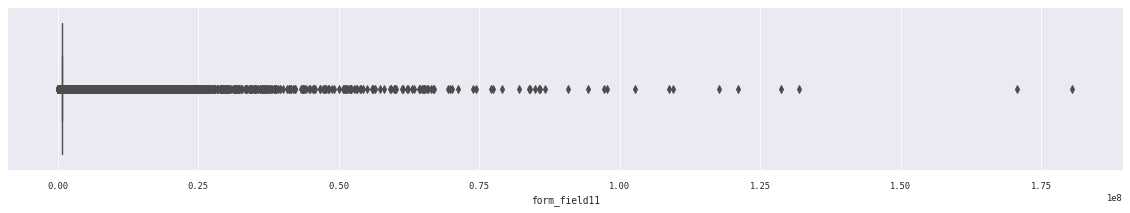

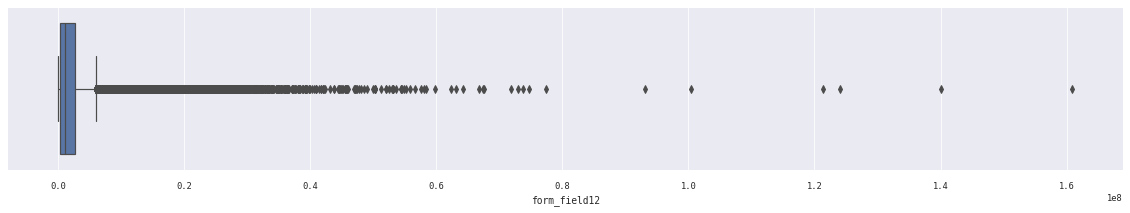

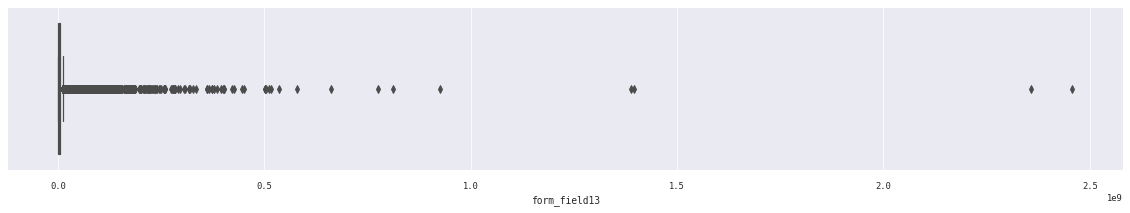

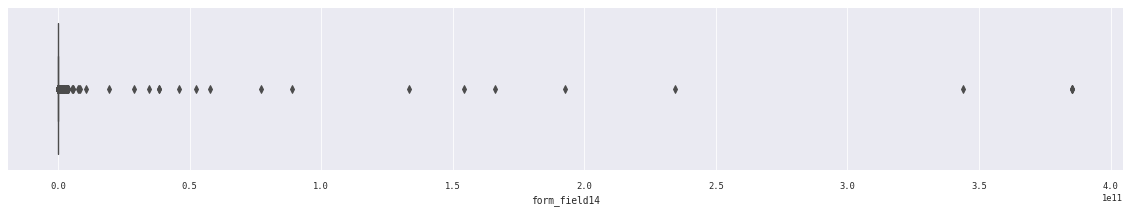

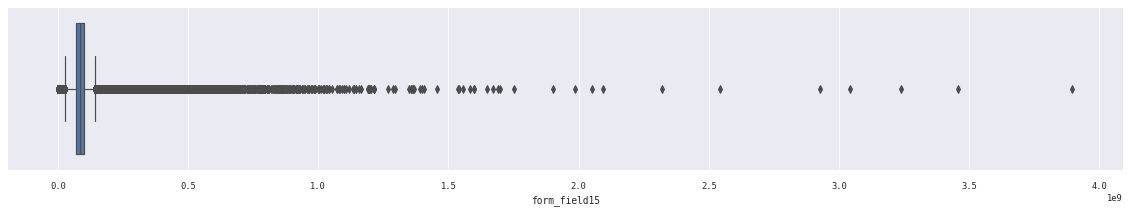

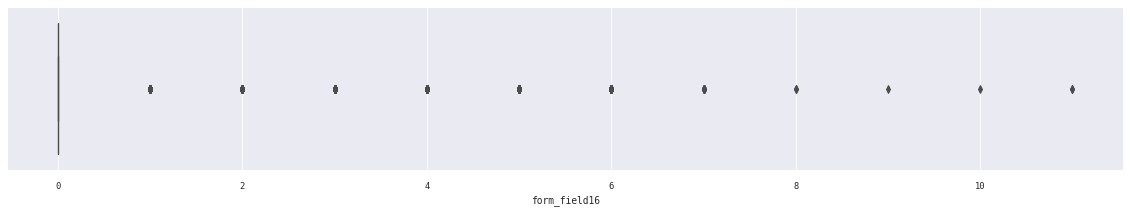

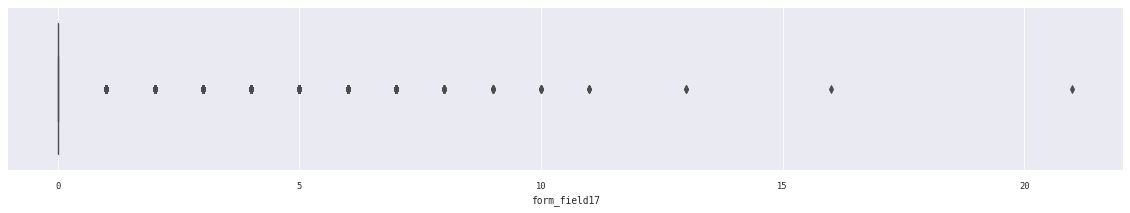

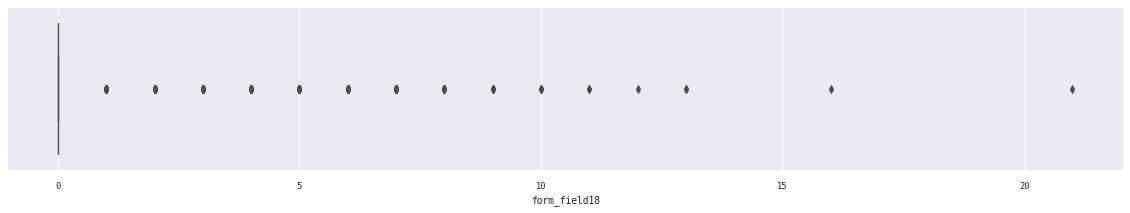

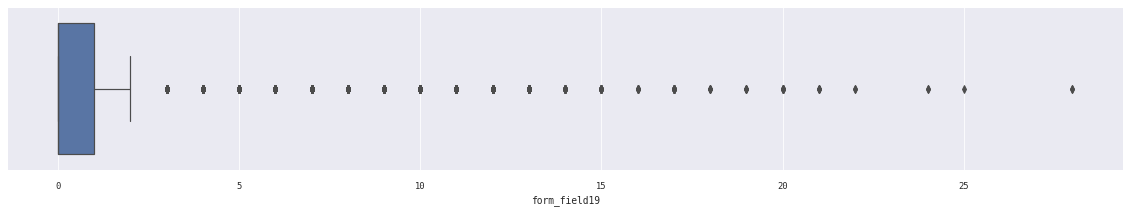

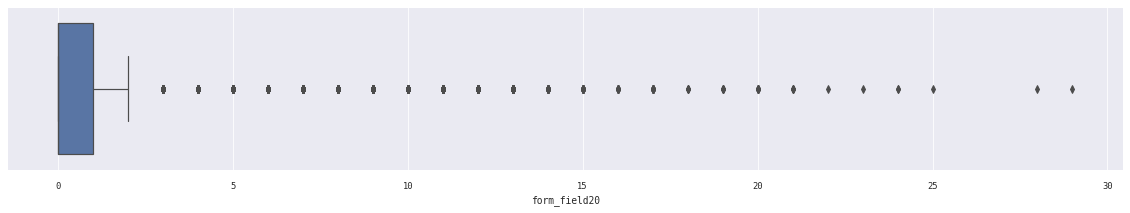

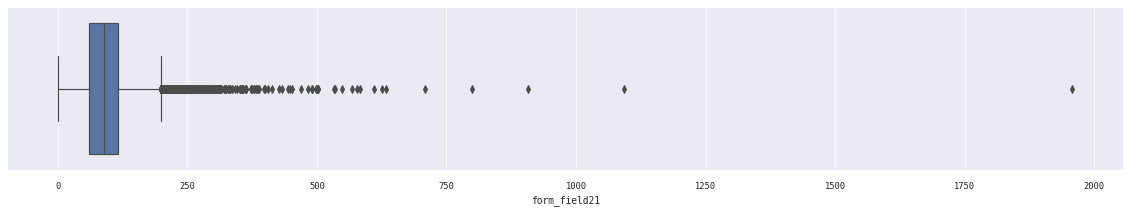

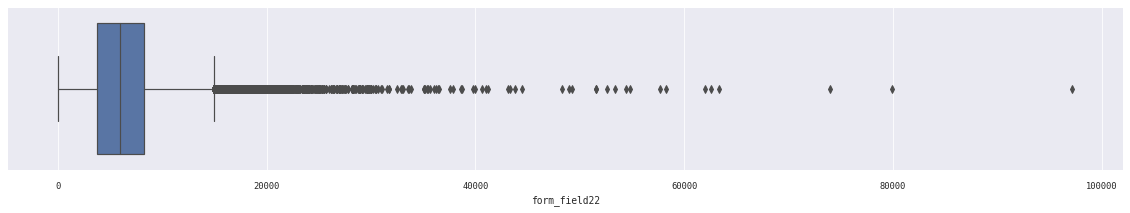

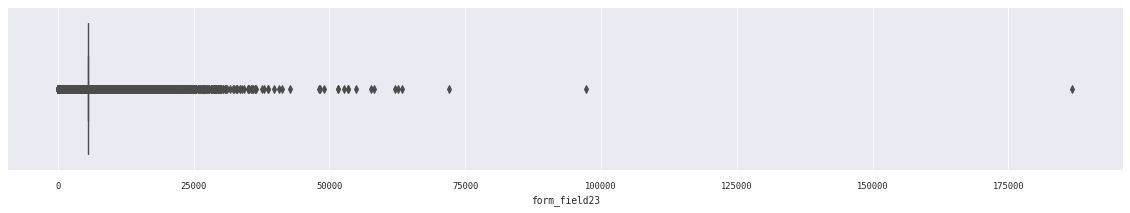

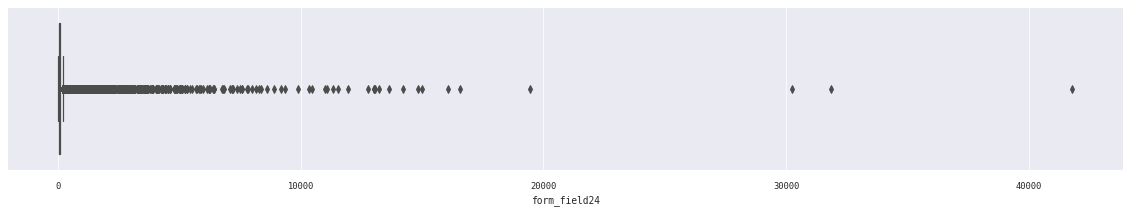

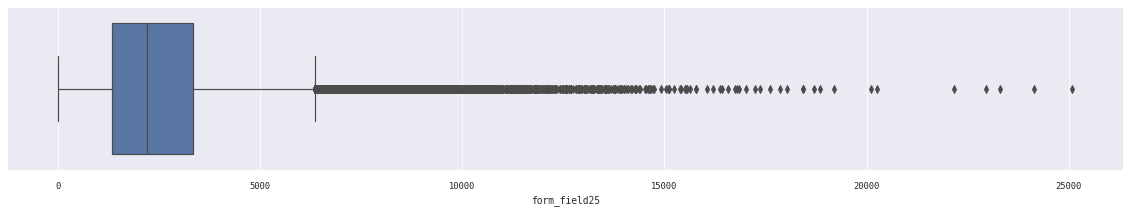

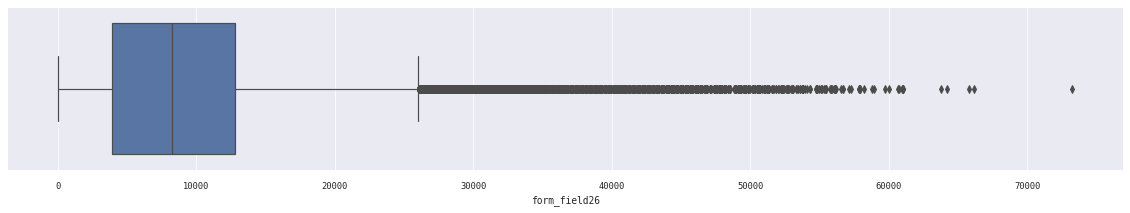

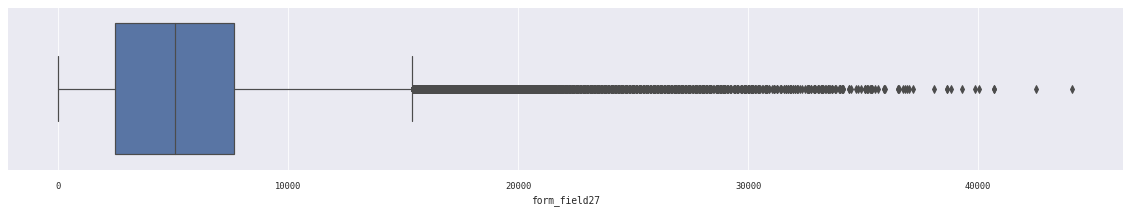

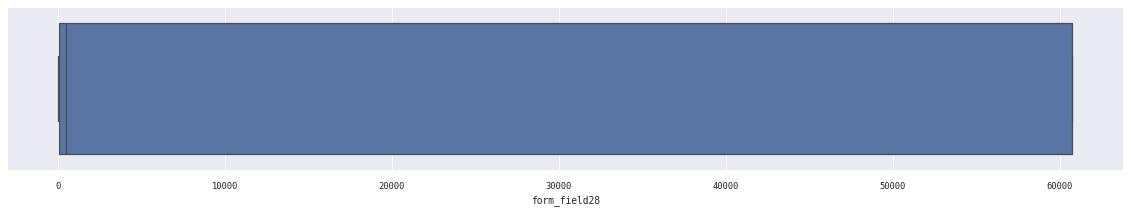

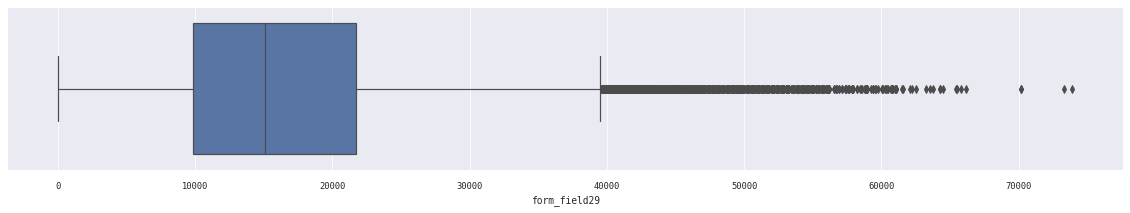

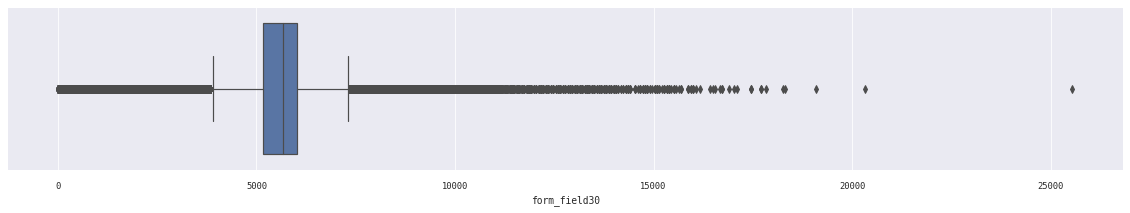

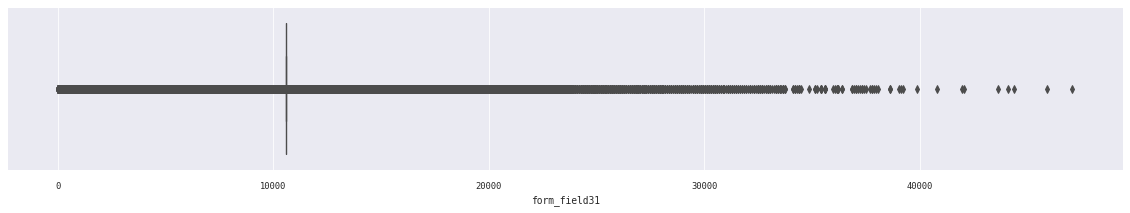

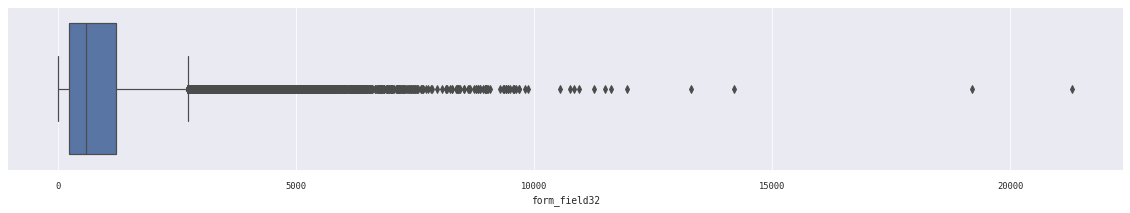

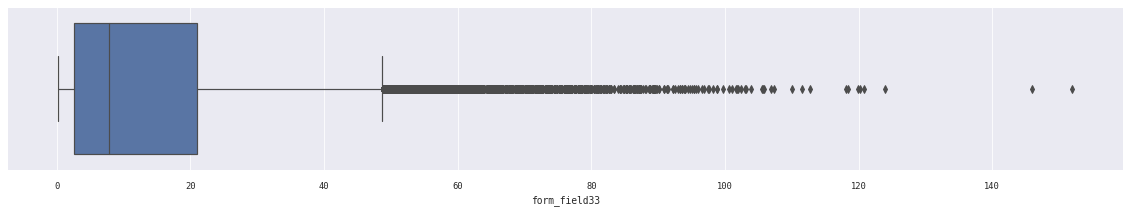

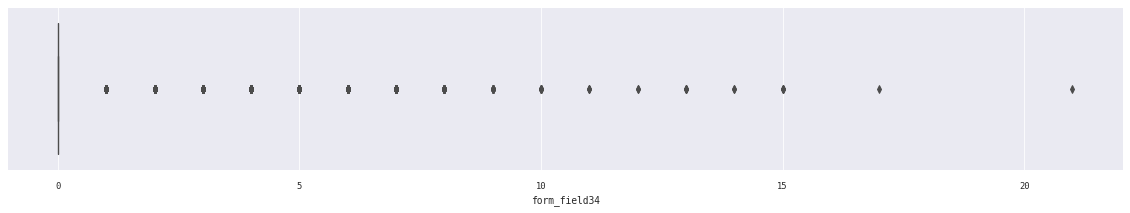

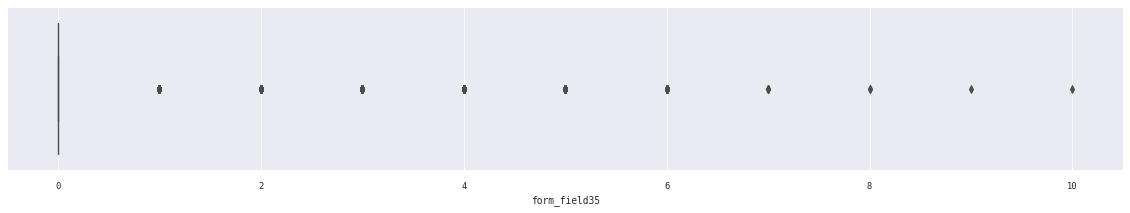

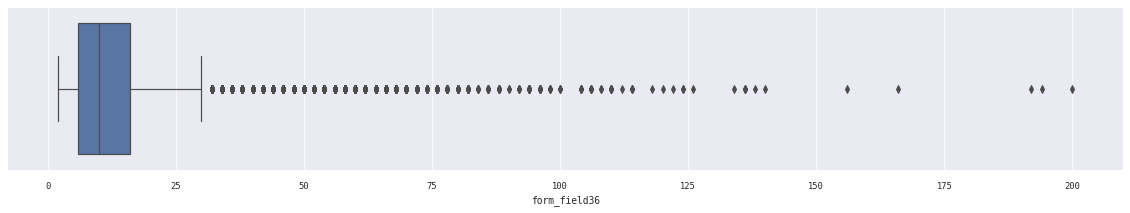

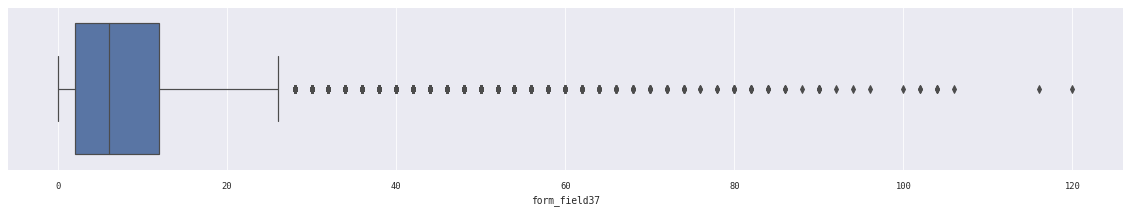

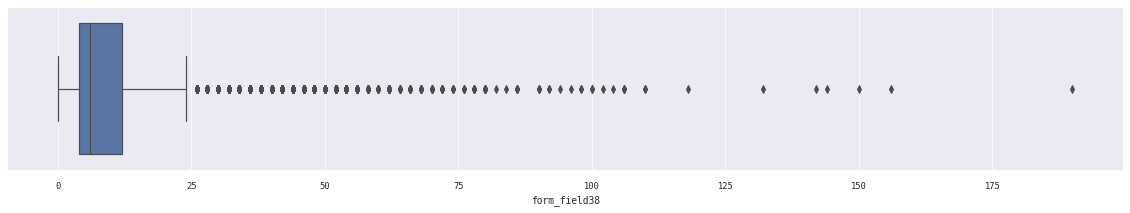

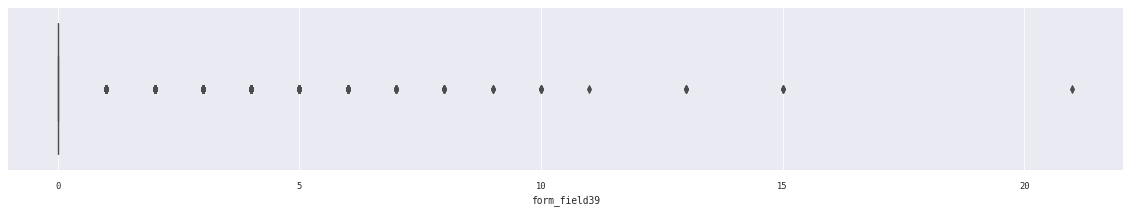

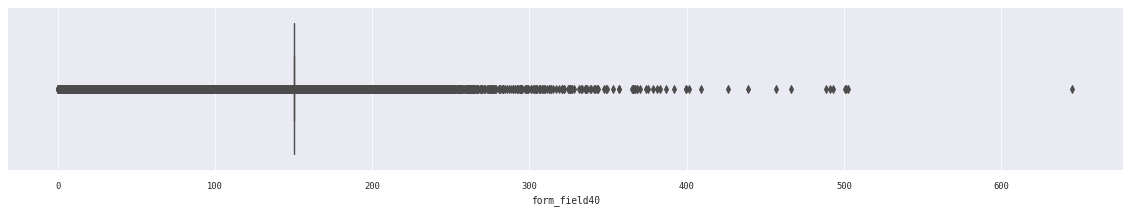

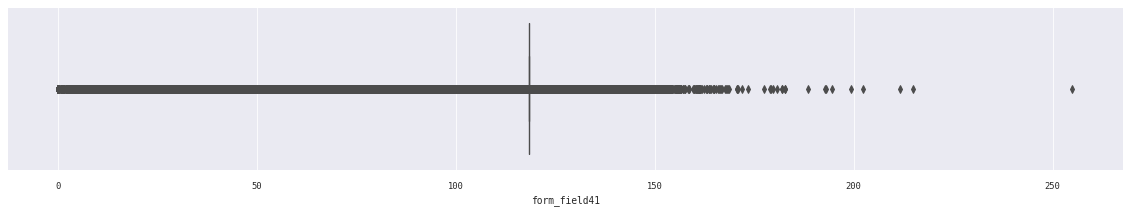

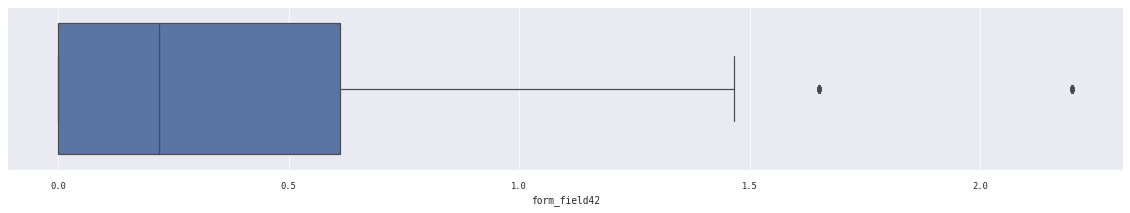

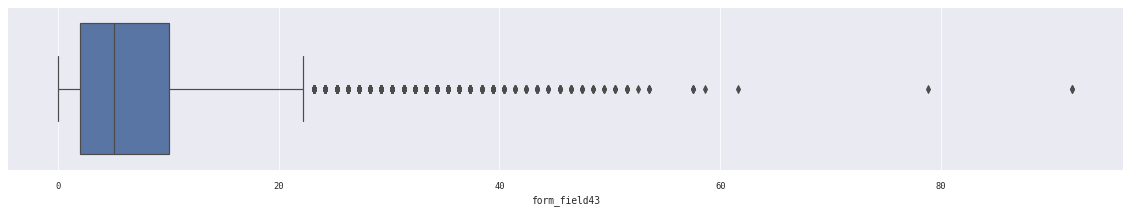

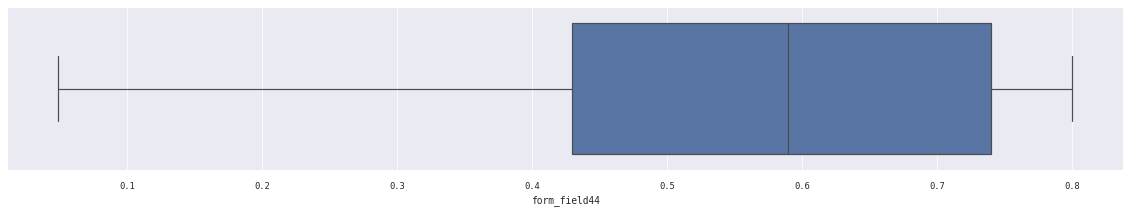

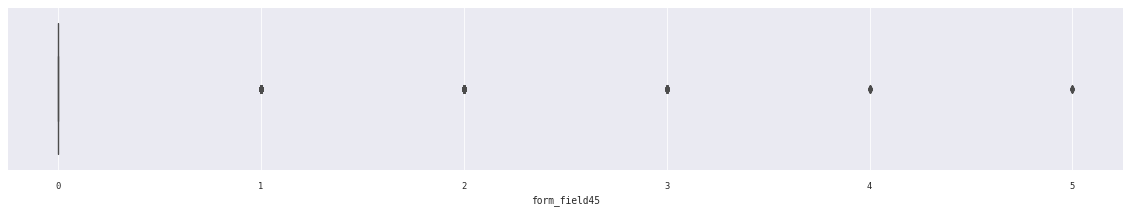

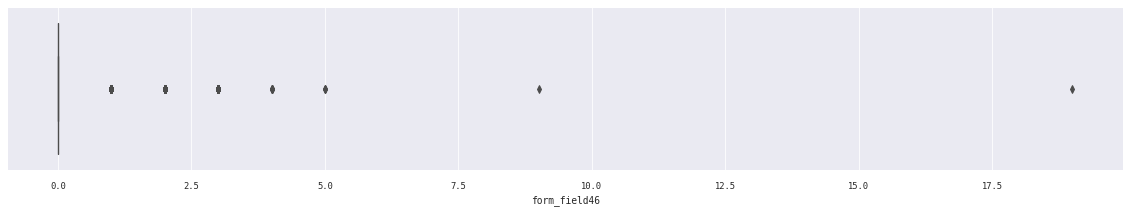

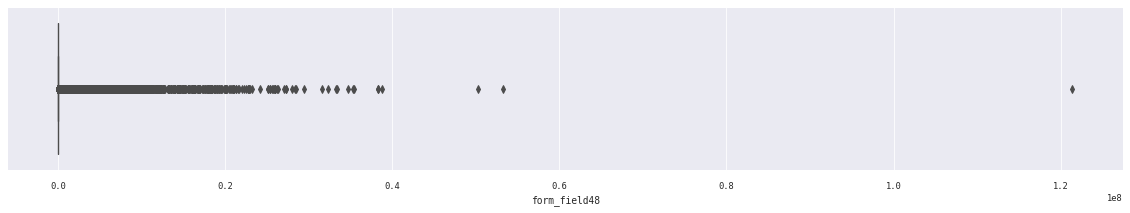

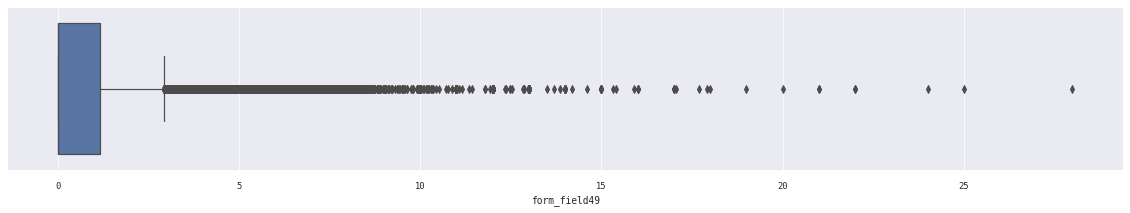

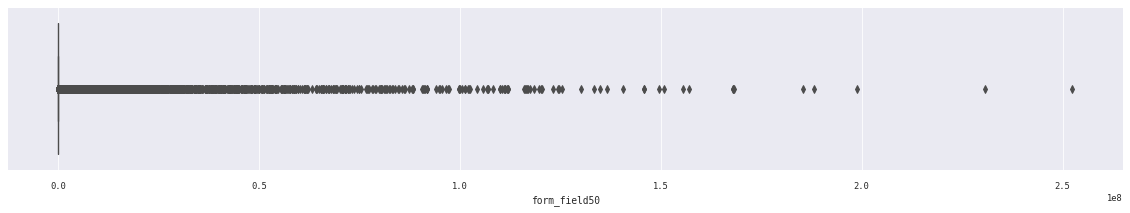

In [22]:
#checking for outliers
num_features = df.select_dtypes(include = np.number).columns
for col in num_features:
    sns.boxplot(col, data = df)
    plt.xlabel(col)
    plt.show()

In [23]:
train_df = df.loc[(df['default_status'] != 'test')]
test_df = df.loc[(df['default_status'] == 'test')]

In [24]:
train_df.shape, test_df.shape

((56000, 51), (24000, 51))

In [25]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
train_df['default_status'] = number.fit_transform(train_df['default_status'].astype('str'))
test_df['default_status'] = number.fit_transform(test_df['default_status'].astype('str'))
train_df['form_field47'] = number.fit_transform(train_df['form_field47'].astype('str'))
test_df['form_field47'] = number.fit_transform(test_df['form_field47'].astype('str'))

In [26]:
X = train_df.drop('default_status', axis = 1)
y = train_df['default_status']

In [27]:
y.head()

Applicant_ID
Apcnt_1000000    0
Apcnt_1000004    0
Apcnt_1000008    1
Apcnt_1000012    0
Apcnt_1000016    0
Name: default_status, dtype: int32

In [28]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
set_printoptions(precision = 3)
print(normalizedX[0:5, :])

[[2.305e-05 1.912e-09 1.111e-08 0.000e+00 0.000e+00 0.000e+00 7.171e-02
  1.691e-03 2.866e-02 7.603e-02 2.950e-02 1.544e-02 5.283e-02 6.465e-01
  7.526e-01 6.708e-09 6.708e-09 6.708e-09 2.013e-08 2.013e-08 9.033e-07
  3.999e-05 3.723e-05 9.033e-07 2.684e-05 1.145e-04 7.632e-05 4.025e-07
  1.145e-04 4.000e-05 7.100e-05 7.057e-06 5.367e-08 1.342e-08 0.000e+00
  8.050e-08 8.050e-08 2.683e-08 0.000e+00 1.006e-06 7.938e-07 2.635e-09
  1.355e-08 4.774e-09 0.000e+00 0.000e+00 0.000e+00 2.125e-06 7.577e-09
  2.974e-10]
 [6.371e-05 1.242e-08 4.317e-09 0.000e+00 0.000e+00 0.000e+00 1.657e-02
  9.172e-03 1.673e-01 4.670e-02 4.503e-03 7.342e-02 3.948e-02 5.188e-01
  8.327e-01 1.843e-08 1.843e-08 1.843e-08 3.687e-08 3.687e-08 2.014e-06
  2.099e-04 2.689e-04 1.598e-06 7.671e-05 2.473e-04 1.648e-04 5.604e-06
  2.473e-04 1.066e-04 1.951e-04 4.708e-05 3.226e-07 0.000e+00 0.000e+00
  2.950e-07 4.424e-07 1.475e-07 0.000e+00 2.765e-06 2.181e-06 5.794e-09
  1.490e-07 3.384e-09 0.000e+00 0.000e+00 0.000e+00

In [29]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold = 0.0).fit(X)
binaryX = binarizer.transform(X)
set_printoptions(precision = 3)
print(binaryX[0:5, :])

[[1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
  1. 1.]
 [1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
  1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
  1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.
  1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
  1. 1.]]


In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func = chi2, k=15)
fit = test.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(15, 'Score'))
set_printoptions(precision = 3)
#print(fit.scores_)
features = fit.transform(X)
#print(features[0:5, :])

           Specs                Score
13  form_field14 408,126,095,093.8315
9   form_field10  96,754,793,712.5082
8    form_field9  70,057,491,025.1934
14  form_field15  49,534,444,172.5611
12  form_field13  39,267,049,725.7140
6    form_field7  37,752,549,142.1140
7    form_field8  15,038,625,523.6690
49  form_field50   7,637,556,531.6894
5    form_field6   4,967,309,280.6256
10  form_field11   3,029,215,549.9223
11  form_field12   1,781,863,486.8092
47  form_field48   1,547,301,583.1148
27  form_field28     113,318,057.6617
25  form_field26      16,346,634.5905
28  form_field29      13,700,674.9439


[0.07907368679595703, 0.045642426822837805, 0.03725037745226364, 0.036218099375825215, 0.03346566370894554, 0.02791642672048, 0.026100349542558545, 0.024130658538447865, 0.023402544920340582, 0.023005356667675593, 0.02289306333445533, 0.022892806111225798, 0.02274180799394584, 0.022453963849254827, 0.02192174003391075]


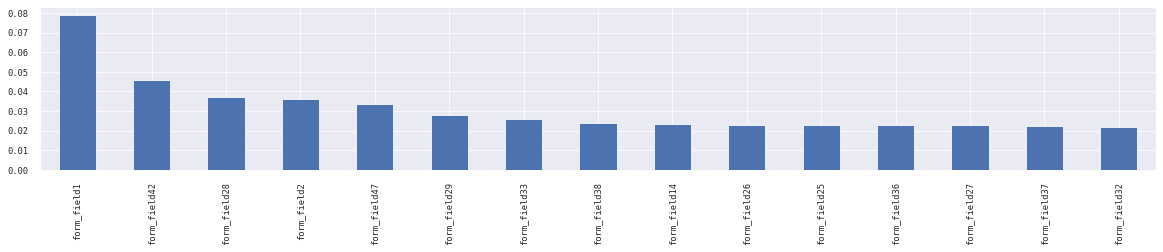

In [31]:
#feature importance with extra tree
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib as mpl
from matplotlib import pyplot as plt
#feature extraction\
model = ExtraTreesClassifier()
model.fit(X, y)
b = pd.Series(model.feature_importances_, index=X.columns)
c = b.nlargest(15)
d = list(c)
print(d)
c.plot(kind='bar')
plt.show()
#print(model.feature_importances_)

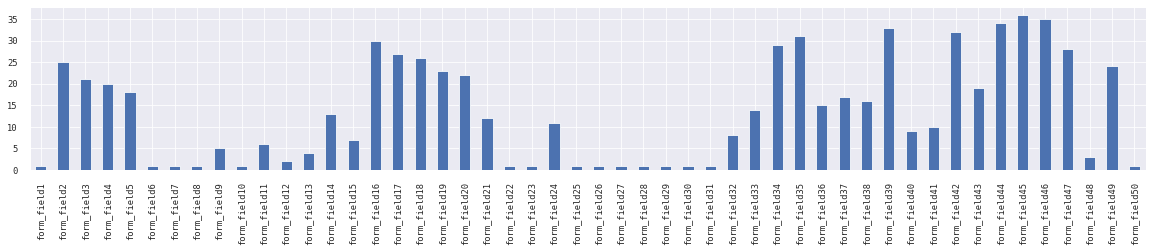

Num Features:  15
Selected Features:  [ True False False False False  True  True  True False  True False False
 False False False False False False False False False  True  True False
  True  True  True  True  True  True  True False False False False False
 False False False False False False False False False False False False
 False  True]
Feature Ranking:  [ 1 25 21 20 18  1  1  1  5  1  6  2  4 13  7 30 27 26 23 22 12  1  1 11
  1  1  1  1  1  1  1  8 14 29 31 15 17 16 33  9 10 32 19 34 36 35 28  3
 24  1]


In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 15) #number of features
fit = rfe.fit(X, y)
c = pd.Series(fit.ranking_, index=X.columns)
c.plot(kind='bar')
plt.show()
#print("Num features: %d") % 
print("Num Features: ", fit.n_features_)
#print("Selected Features: %s")  
print("Selected Features: ", fit.support_)
#print('Feature Ranking: %s') % 
print("Feature Ranking: ", fit.ranking_)

In [33]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
set_printoptions(precision = 3)
#print(normalizedX[0:5, :])

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 7
kfold = KFold(n_splits = num_folds, random_state = seed)
model = LogisticRegression()
model.fit(X, y)
scoring = 'roc_auc'
results = cross_val_score(model, X, y, cv = kfold, scoring = scoring)
print("AUC: ", results.mean()*100, results.std())

AUC:  73.67695288417181 0.008910976610720794


In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
num_folds = 15
seed = 7
kfold = KFold(n_splits = num_folds, random_state = seed)
model = LinearDiscriminantAnalysis()
scoring = 'roc_auc'
results = cross_val_score(model, X, y, cv = kfold, scoring = scoring)
print("AUC: ", results.mean()*100, results.std())

AUC:  82.14038457635405 0.00863829697241568


In [36]:
model = DecisionTreeClassifier()
results = cross_val_score(model, X, y, cv = kfold, scoring = scoring)
print("AUC: ", results.mean()*100, results.std())

AUC:  63.80226745885618 0.010097980196168801


In [37]:
model = GaussianNB()
results = cross_val_score(model, X, y, cv = kfold, scoring = scoring)
print("AUC: ", results.mean()*100, results.std())

AUC:  72.55783430194069 0.010450977669865674


In [38]:
#model = SVC()
#results = cross_val_score(model, X, y, cv = kfold, scoring = scoring)
#print("AUC: ", results.mean()*100, results.std())

In [39]:
gbm = GradientBoostingClassifier()
model = gbm
results = cross_val_score(model, X, y, cv = kfold, scoring = scoring)
print("AUC: ", results.mean()*100, results.std())

AUC:  83.41735446112796 0.009094372378774725


In [40]:
model = KNeighborsClassifier()
results = cross_val_score(model, X, y, cv = kfold, scoring = scoring)
print("AUC: ", results.mean()*100, results.std())

AUC:  67.82818660075446 0.008816749791890106


In [41]:
from sklearn.ensemble import BaggingClassifier
kfold = KFold(n_splits = 10, random_state = 7)
seed = 7
num_trees = 100
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator = cart, n_estimators = num_trees, random_state = seed)
results = cross_val_score(model, X, y, cv = kfold)
print(results.mean())

0.8028214285714285


In [42]:
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 3
kfold = KFold(n_splits = 10, random_state = 7)
model = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)
results = cross_val_score(model, X, y, cv = kfold)
print(results.mean())

0.8055


In [43]:
from sklearn.ensemble import ExtraTreesClassifier
num_trees = 100
max_features = 7
kfold = KFold(n_splits = 10, random_state = 7)
model = ExtraTreesClassifier(n_estimators = num_trees, max_features = max_features)
results = cross_val_score(model, X, y, cv = kfold)
print(results.mean())

0.80575


In [44]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier
num_trees = 30
seed = 7
kfold = KFold(n_splits = 10, random_state = 7)
model = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)
results = cross_val_score(model, X, y, cv = kfold)
print(results.mean())

0.797232142857143


In [45]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.23775005882211842
1.0


In [46]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'alpha': uniform()}
model = Ridge()
research = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 100, random_state = 7)
research.fit(X, y)
print(research.best_score_)
print(research.best_estimator_.alpha)

0.23775005255095358
0.9779895119966027


In [ ]:
gbm.fit(X, y)
test_x = test_df.drop('default_status', axis = 1)
prediction = gbm.predict_proba(test_x)[:, 1]
prediction

In [ ]:
sub = pd.read_csv('sub.csv')
sub['default_status'] = prediction
sub.to_csv('submission1.csv', index = False)

# Using Catboost Classifier

In [13]:
train = pd.read_csv('Train_data.csv')
test  = pd.read_csv('Test_data.csv')

In [14]:
dict_ = {'charge': 1,
         'lending': 0}

target_map = {
    'yes': 1,
    'no': 0}

train.default_status.replace(target_map, inplace = True)

train['form_field47'].replace(dict_, inplace = True)
test['form_field47'].replace(dict_, inplace = True)

In [15]:
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

In [16]:
features = train.select_dtypes(exclude = object).columns.drop(['default_status'])

In [17]:
for col in features:
    train[col].fillna(-999, inplace = True)
    test[col].fillna(-999, inplace = True)

In [18]:
X = train[features]
y = train['default_status']

In [19]:
from sklearn.model_selection import StratifiedKFold

In [20]:
def metric(y, pred):
    return roc_auc_score(y, pred, labels=[0, 1])

In [21]:
# Specifing number of folds
n_skf = 15
kf = StratifiedKFold(n_skf)


seed = 2020

## Manually tweaking the hyperparameter, learning rate and n_estimators especially
params = {
    'n_estimators': 4000,
    'learning_rate': 0.01,
    'objective': 'CrossEntropy',
      'eval_metric':'AUC',
    'random_seed': seed,
    'early_stopping_rounds': 200,
    'use_best_model': True,
}

In [22]:
score_list = []
score = 0
test_oofs = []

for i, (tr_idx, vr_idx) in enumerate(kf.split(X, y)):
    
    xtrain, ytrain = X.loc[tr_idx, features], y.loc[tr_idx]
    xval, yval = X.loc[vr_idx, features], y.loc[vr_idx]

    model = CatBoostClassifier(**params)
    model.fit(xtrain, ytrain, eval_set=[(xval,yval)], verbose=100)
    
    p = model.predict_proba(xval)[:, 1]
    sc = metric(yval, p)
    score_list.append(sc)
    score += sc/n_skf
    
    pred = model.predict_proba(test[features])[:, 1]
    test_oofs.append(pred)

    print('Fold {} : {}'.format(i, sc))

print()
print()
print('Avg log : ', score)

0:	test: 0.7792704	best: 0.7792704 (0)	total: 300ms	remaining: 20m 1s
100:	test: 0.8147537	best: 0.8147731 (99)	total: 5.64s	remaining: 3m 37s
200:	test: 0.8189173	best: 0.8189173 (200)	total: 11.3s	remaining: 3m 32s
300:	test: 0.8215691	best: 0.8215691 (300)	total: 16.4s	remaining: 3m 21s
400:	test: 0.8232722	best: 0.8232858 (399)	total: 21.7s	remaining: 3m 14s
500:	test: 0.8246574	best: 0.8246574 (500)	total: 26.6s	remaining: 3m 5s
600:	test: 0.8257135	best: 0.8257150 (599)	total: 31.8s	remaining: 2m 59s
700:	test: 0.8266529	best: 0.8266540 (698)	total: 36.8s	remaining: 2m 53s
800:	test: 0.8273251	best: 0.8273333 (795)	total: 41.8s	remaining: 2m 46s
900:	test: 0.8280222	best: 0.8280222 (900)	total: 47s	remaining: 2m 41s
1000:	test: 0.8283494	best: 0.8283517 (995)	total: 52s	remaining: 2m 35s
1100:	test: 0.8286859	best: 0.8286859 (1100)	total: 57.1s	remaining: 2m 30s
1200:	test: 0.8289460	best: 0.8289747 (1193)	total: 1m 1s	remaining: 2m 24s
1300:	test: 0.8292294	best: 0.8292294 (1300

800:	test: 0.8469664	best: 0.8469688 (798)	total: 41.7s	remaining: 2m 46s
900:	test: 0.8472463	best: 0.8472522 (887)	total: 47.4s	remaining: 2m 43s
1000:	test: 0.8475018	best: 0.8475096 (998)	total: 52.2s	remaining: 2m 36s
1100:	test: 0.8476356	best: 0.8476356 (1100)	total: 57s	remaining: 2m 30s
1200:	test: 0.8478562	best: 0.8478562 (1200)	total: 1m 2s	remaining: 2m 25s
1300:	test: 0.8478593	best: 0.8479105 (1219)	total: 1m 8s	remaining: 2m 22s
1400:	test: 0.8479101	best: 0.8479492 (1362)	total: 1m 14s	remaining: 2m 18s
1500:	test: 0.8479011	best: 0.8479492 (1362)	total: 1m 21s	remaining: 2m 15s
1600:	test: 0.8479450	best: 0.8479868 (1571)	total: 1m 27s	remaining: 2m 11s
1700:	test: 0.8478031	best: 0.8479868 (1571)	total: 1m 34s	remaining: 2m 7s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8479868263
bestIteration = 1571

Shrink model to first 1572 iterations.
Fold 3 : 0.847986826317126
0:	test: 0.7781107	best: 0.7781107 (0)	total: 69.2ms	remaining: 4m 36s
100:	

700:	test: 0.8405253	best: 0.8405253 (700)	total: 42.7s	remaining: 3m 21s
800:	test: 0.8410229	best: 0.8410229 (800)	total: 48.6s	remaining: 3m 13s
900:	test: 0.8413380	best: 0.8413380 (900)	total: 54.1s	remaining: 3m 5s
1000:	test: 0.8417685	best: 0.8417828 (999)	total: 59.8s	remaining: 2m 59s
1100:	test: 0.8421837	best: 0.8421946 (1098)	total: 1m 6s	remaining: 2m 55s
1200:	test: 0.8424721	best: 0.8424915 (1196)	total: 1m 13s	remaining: 2m 50s
1300:	test: 0.8425284	best: 0.8425901 (1259)	total: 1m 18s	remaining: 2m 42s
1400:	test: 0.8426681	best: 0.8426681 (1400)	total: 1m 23s	remaining: 2m 34s
1500:	test: 0.8427962	best: 0.8428478 (1472)	total: 1m 29s	remaining: 2m 28s
1600:	test: 0.8427613	best: 0.8428478 (1472)	total: 1m 34s	remaining: 2m 21s
1700:	test: 0.8428913	best: 0.8428971 (1698)	total: 1m 39s	remaining: 2m 14s
1800:	test: 0.8429949	best: 0.8429949 (1800)	total: 1m 46s	remaining: 2m 10s
1900:	test: 0.8429712	best: 0.8430252 (1818)	total: 1m 53s	remaining: 2m 4s
2000:	test: 0

Fold 11 : 0.850074478977057
0:	test: 0.7967801	best: 0.7967801 (0)	total: 71.2ms	remaining: 4m 44s
100:	test: 0.8577958	best: 0.8577958 (100)	total: 5.24s	remaining: 3m 22s
200:	test: 0.8599912	best: 0.8600738 (195)	total: 9.67s	remaining: 3m 2s
300:	test: 0.8619612	best: 0.8619865 (297)	total: 14.3s	remaining: 2m 56s
400:	test: 0.8630538	best: 0.8630608 (399)	total: 19s	remaining: 2m 50s
500:	test: 0.8638964	best: 0.8639034 (498)	total: 23.6s	remaining: 2m 44s
600:	test: 0.8645422	best: 0.8645422 (600)	total: 28.2s	remaining: 2m 39s
700:	test: 0.8649924	best: 0.8650064 (699)	total: 32.5s	remaining: 2m 33s
800:	test: 0.8653918	best: 0.8653918 (800)	total: 37.2s	remaining: 2m 28s
900:	test: 0.8657224	best: 0.8657298 (898)	total: 41.8s	remaining: 2m 23s
1000:	test: 0.8660333	best: 0.8660353 (998)	total: 46.5s	remaining: 2m 19s
1100:	test: 0.8663256	best: 0.8663403 (1092)	total: 51.2s	remaining: 2m 14s
1200:	test: 0.8664055	best: 0.8664253 (1165)	total: 55.8s	remaining: 2m 9s
1300:	test: 

In [23]:
f"{n_skf} fold CV, score: {score}"

'15 fold CV, score: 0.841252685902586'

In [24]:
oof_prediction = pd.DataFrame(test_oofs).T

In [25]:
oof_prediction.columns = ['fold_'+ str(i) for i in range(1, n_skf + 1)]

In [26]:
oof_prediction.head()

,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9,fold_10,fold_11,fold_12,fold_13,fold_14,fold_15
0,0.3211,0.2787,0.3461,0.3339,0.3143,0.2951,0.2834,0.3179,0.3372,0.3003,0.3101,0.3093,0.2907,0.3142,0.2774
1,0.3829,0.3753,0.4238,0.4150,0.2998,0.4145,0.4375,0.4556,0.3948,0.4191,0.3719,0.4062,0.4044,0.4025,0.3555
2,0.3699,0.3719,0.3605,0.3579,0.3806,0.3795,0.3850,0.3684,0.3952,0.3583,0.3938,0.3662,0.3603,0.3532,0.3559
3,0.7550,0.7299,0.7335,0.7271,0.7453,0.7507,0.7111,0.7445,0.7232,0.7248,0.7378,0.7310,0.7251,0.7182,0.7204
4,0.1507,0.1577,0.1854,0.1966,0.1645,0.1831,0.1658,0.1766,0.1856,0.1967,0.1686,0.1829,0.2050,0.1879,0.1952


In [27]:
sub = pd.read_csv('sub.csv')

In [28]:
### We take the mean of all 5 predictions to generate submission

In [29]:
sub['default_status'] = np.mean(test_oofs, axis = 0) 

In [30]:
sub.to_csv('submissions.csv', index = False)